In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gapnet.models import GAPNet
from data_loader import DataGenerator
import numpy as np

In [4]:
model_weights_path = "logs/gapnet/05-first_full_network/model_weights.h5"
model = GAPNet()
model.load_weights(model_weights_path)

explain_model = model.create_explaining_model()

tags = ['bathtub', 'bed', 'chair', 'desk', 'dresser', 'monitor', 'night stand', 
        'sofa', 'table', 'toilet', 'airplane', 'bench', 'bookshelf', 'bottle', 
        'bowl', 'car', 'cone', 'cup', 'curtain', 'door', 'flower pot', 'glass box', 
        'guitar', 'keyboard', 'lamp', 'laptop', 'mantel', 'person', 'piano', 
        'plant', 'radio', 'range hood', 'sink', 'stairs', 'stool', 'tent',
        'tv stand', 'vase', 'wardrobe', 'xbox']

In [5]:
# Data preparation.
test_file = './ModelNet40/ply_data_test.h5'
train_file = './ModelNet40/ply_data_train.h5'

# Hyperparameters.
nb_classes = 40
number_of_points = 1024
epochs = 100
batch_size = 1

# Data generators for training and validation.
#val = DataGenerator(test_file, batch_size, number_of_points, nb_classes, train=True).generator() 
val = DataGenerator(test_file, batch_size, number_of_points, nb_classes, train=False).generator() # does not training have to be false - no jitter / no rotating

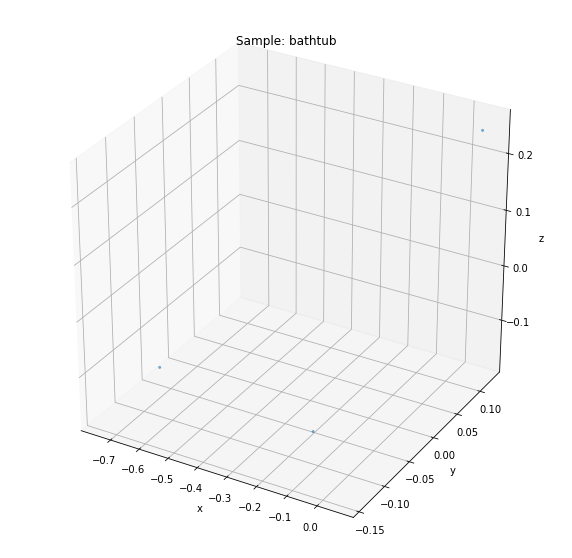

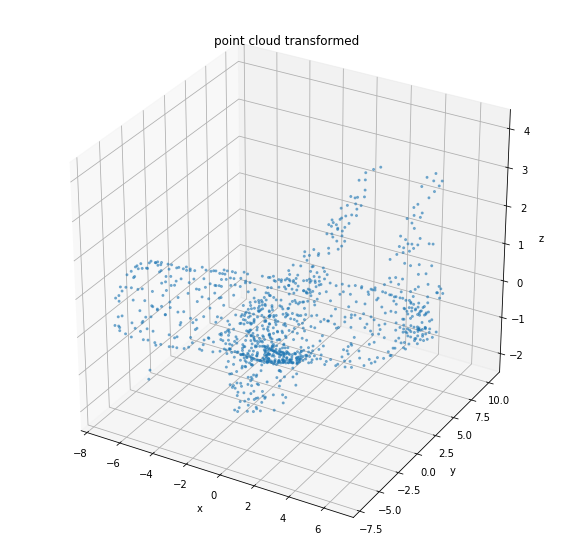

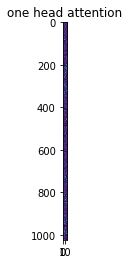

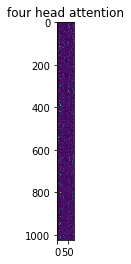

In [6]:
def render_pointcloud(points, title=None):
    """
    Renders a point-cloud.
    """

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(points[:,0], points[:,1], points[:,2], s=4.0, cmap="gray", alpha=0.5)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    if title != None:
        plt.title(title)

    plt.show()
    plt.close()

def render_attention(attention, title=None):
    plt.imshow(np.squeeze(attention))
    
    if title != None:
        plt.title(title)

    plt.show()
    plt.close()

# Get a sample and render it.    
#sample = next(val)[0]
sample = next(val)
title = tags[int(np.where(sample[1]==1)[1])]
render_pointcloud(sample[0],title="Sample: " + title)

# Use the model for prediction.
prediction = explain_model.predict(sample)

# Render the transformed pointcloud.
point_cloud_transformed = prediction[0][0]
render_pointcloud(point_cloud_transformed, title="point cloud transformed")

# Render the one head attention.
one_head_attention = prediction[1][0]
render_attention(one_head_attention, title="one head attention")

# Render the four head attention.
four_head_attention = prediction[2][0]
render_attention(four_head_attention, title="four head attention")


